In [1]:
import numpy as np
from scipy import misc
from IPython.display import Image
from IPython.display import display
import time

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


In [2]:
def create_groups(D,K,means):
    D2 = np.sum(np.square(D),axis = 0,keepdims=True).T
    means2 = np.sum(np.square(means),axis = 0,keepdims=True)
    M = D2+means2 - 2. * np.dot(D.T,means)
    return np.argmin(M,axis = 1).T
    
def randomize(n,K):
    a = np.arange(n)
    np.random.shuffle(a)
    return a[:K]
def my_kmeans(K,D):
    iteracje = 0
    #K - liczba grup, D - macierz danych d x n, gdzie n to liczba elementow
    n = D.shape[1]
    old_means = []
    groups = []
    randomed = randomize(n,K)
    new_means = D[:,randomed]
    while(not np.array_equal(old_means,new_means) and iteracje < 100):
        iteracje += 1
        groups = create_groups(D,K,new_means)
        #print "grupy:",groups
        old_means = np.copy(new_means)
        macierz = np.take(np.eye(K),groups,axis = 0)
        #ta instrukcja wybiera mi odpowiednie wiersze z macierz identycznosciowej -> w i-tym wierszu mam infromacje do ktorej grupy nalezy wektor
        #print macierz.shape
        new_means = np.dot(D,macierz) # jesli nie uzywam np.matrix nie ma problemu z wyciaganiem i-tego elem z groups
        new_means /= np.maximum(np.sum(macierz,axis = 0),1) #na problemy z dzieleniem przez 0
        #axis = 0 kolumnowo 
    return groups, new_means

In [3]:
def compare_photos(infile,outfile,K):
    photo = misc.imread(infile)
    #misc.imshow(photo)
    #print photo.shape
    B,A,d = photo.shape
    photo = np.reshape(photo,(A*B,d)).T
    t1 = time.time()
    groups, means = my_kmeans(K,photo)
    t2 = time.time()
    print "Czas: ",t2-t1
    edited_photo = np.empty(photo.shape)
    for i in range(photo.shape[1]):
        edited_photo[:,i] = means[:,groups[i]]
    edited_photo = np.reshape(edited_photo.T,(B,A,d))
    #misc.imshow(edited_photo)
    misc.imsave(outfile,edited_photo)
    p1 = Image(infile)
    p2 = Image(outfile)
    display(p1,p2)

Czas:  0.669757127762


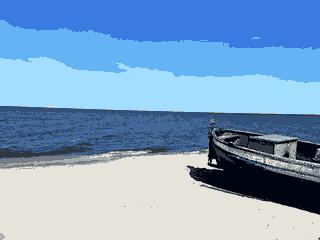

In [4]:
compare_photos("zdjecie1.jpg","z1.jpg",10) #wszystkie zdjecia zajely jakies 15 min

Czas:  61.4703700542


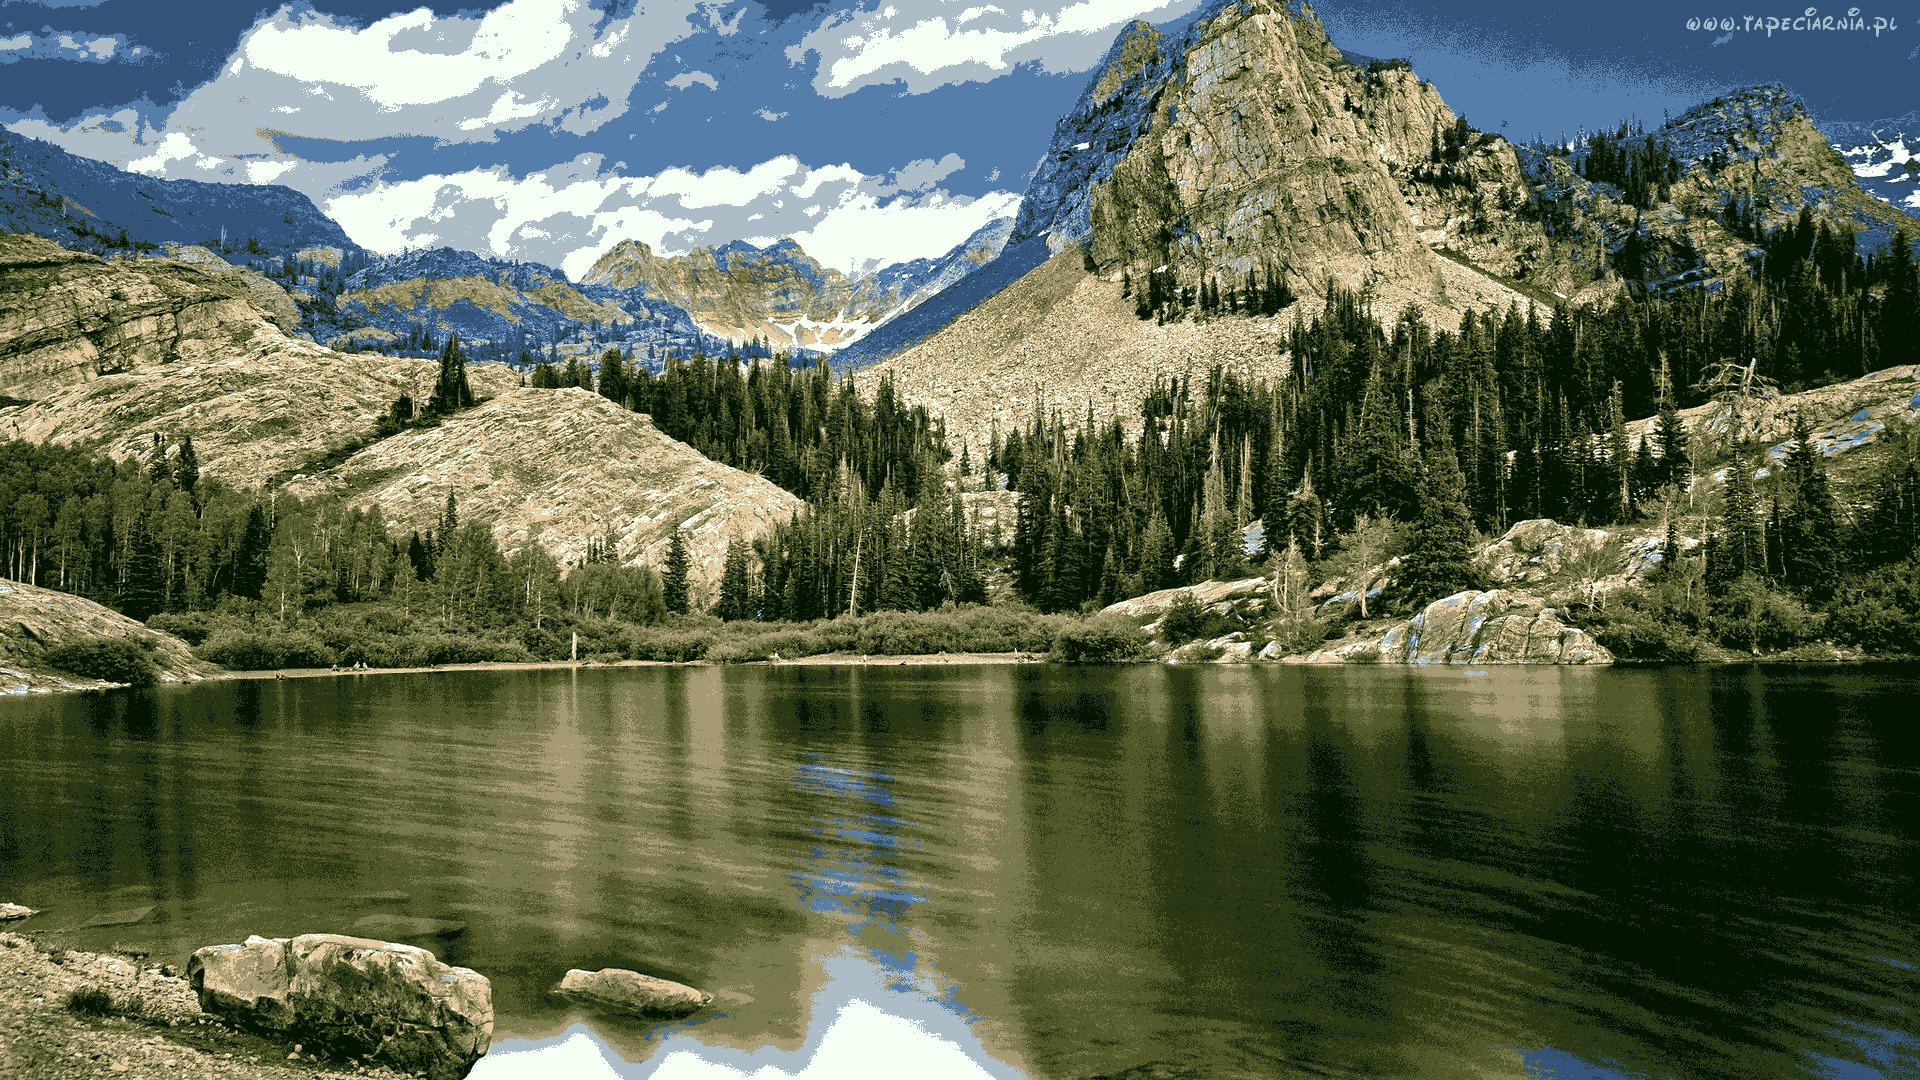

In [5]:
compare_photos("zdjecie2.jpg","z2.jpg",10)

Czas:  39.3030328751


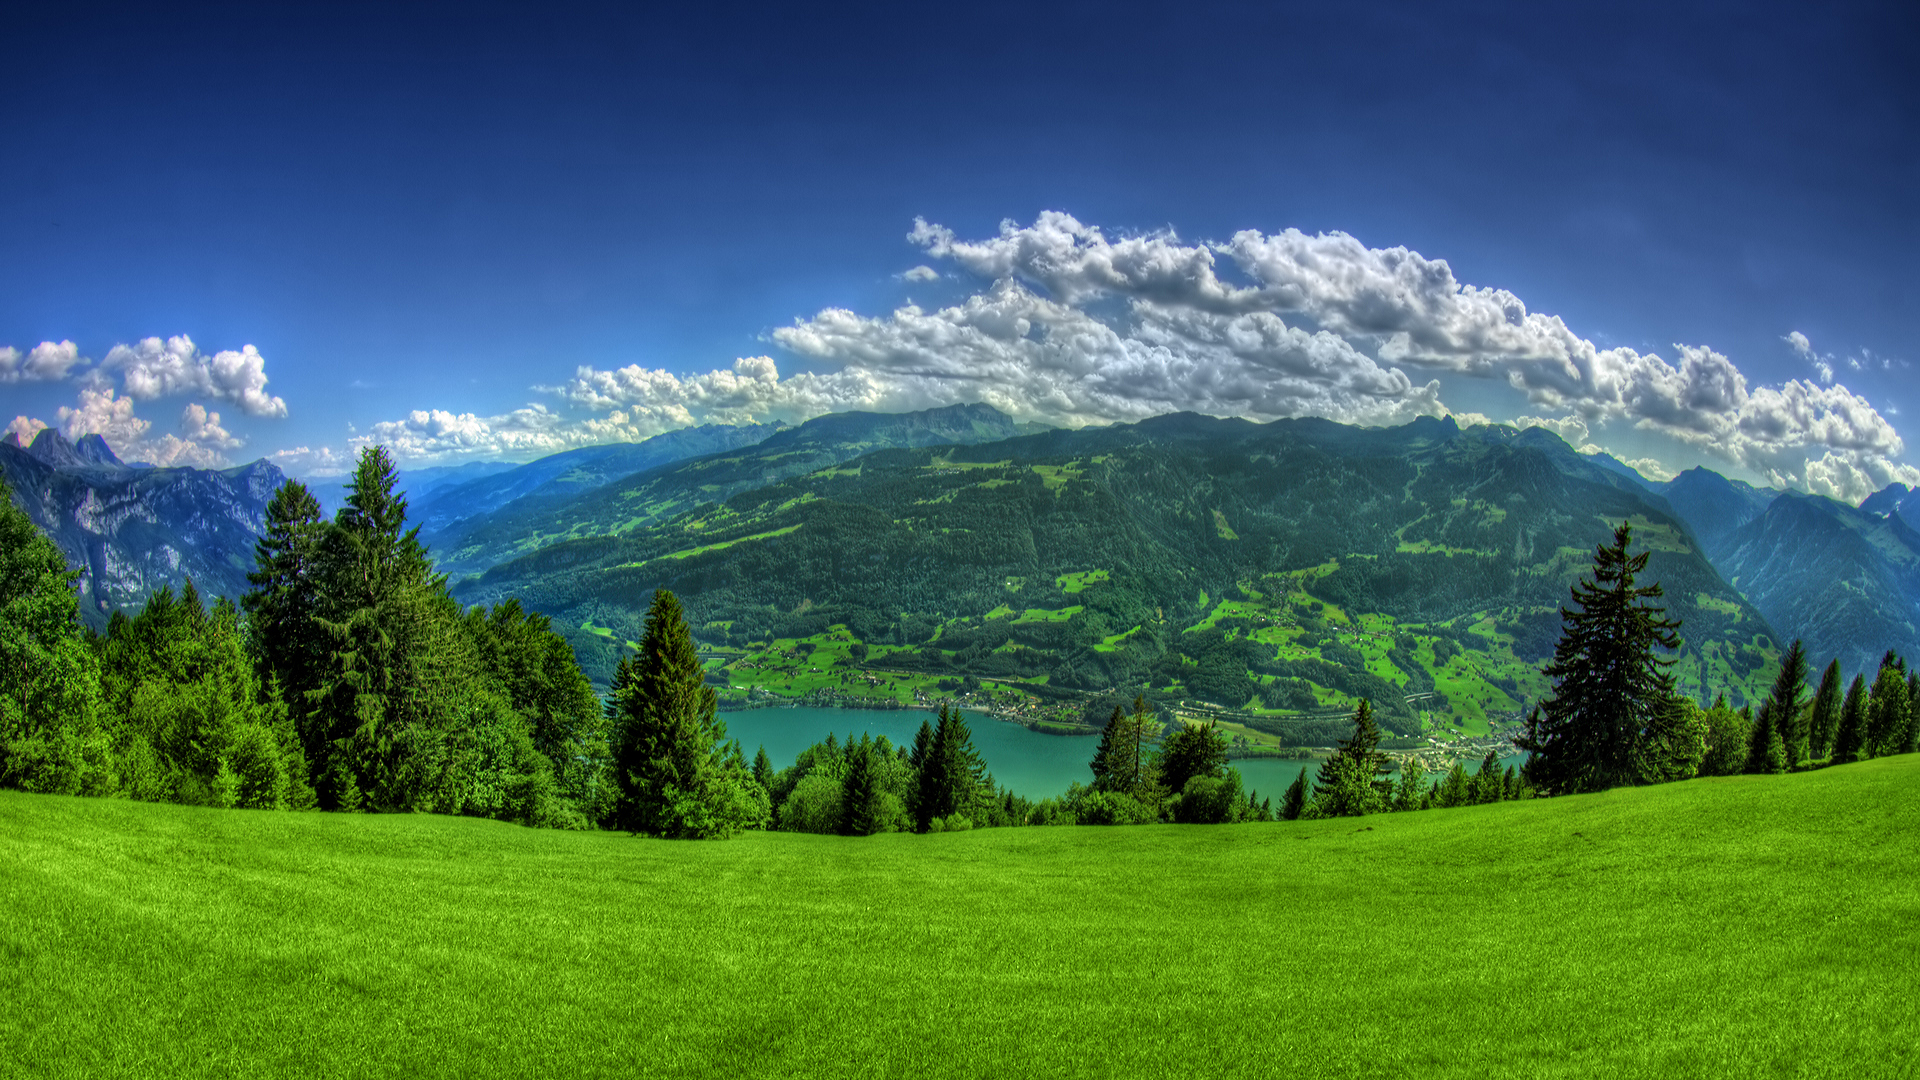

In [6]:
compare_photos("zdjecie3.jpg","z3.jpg",10)

Czas:  77.9850430489


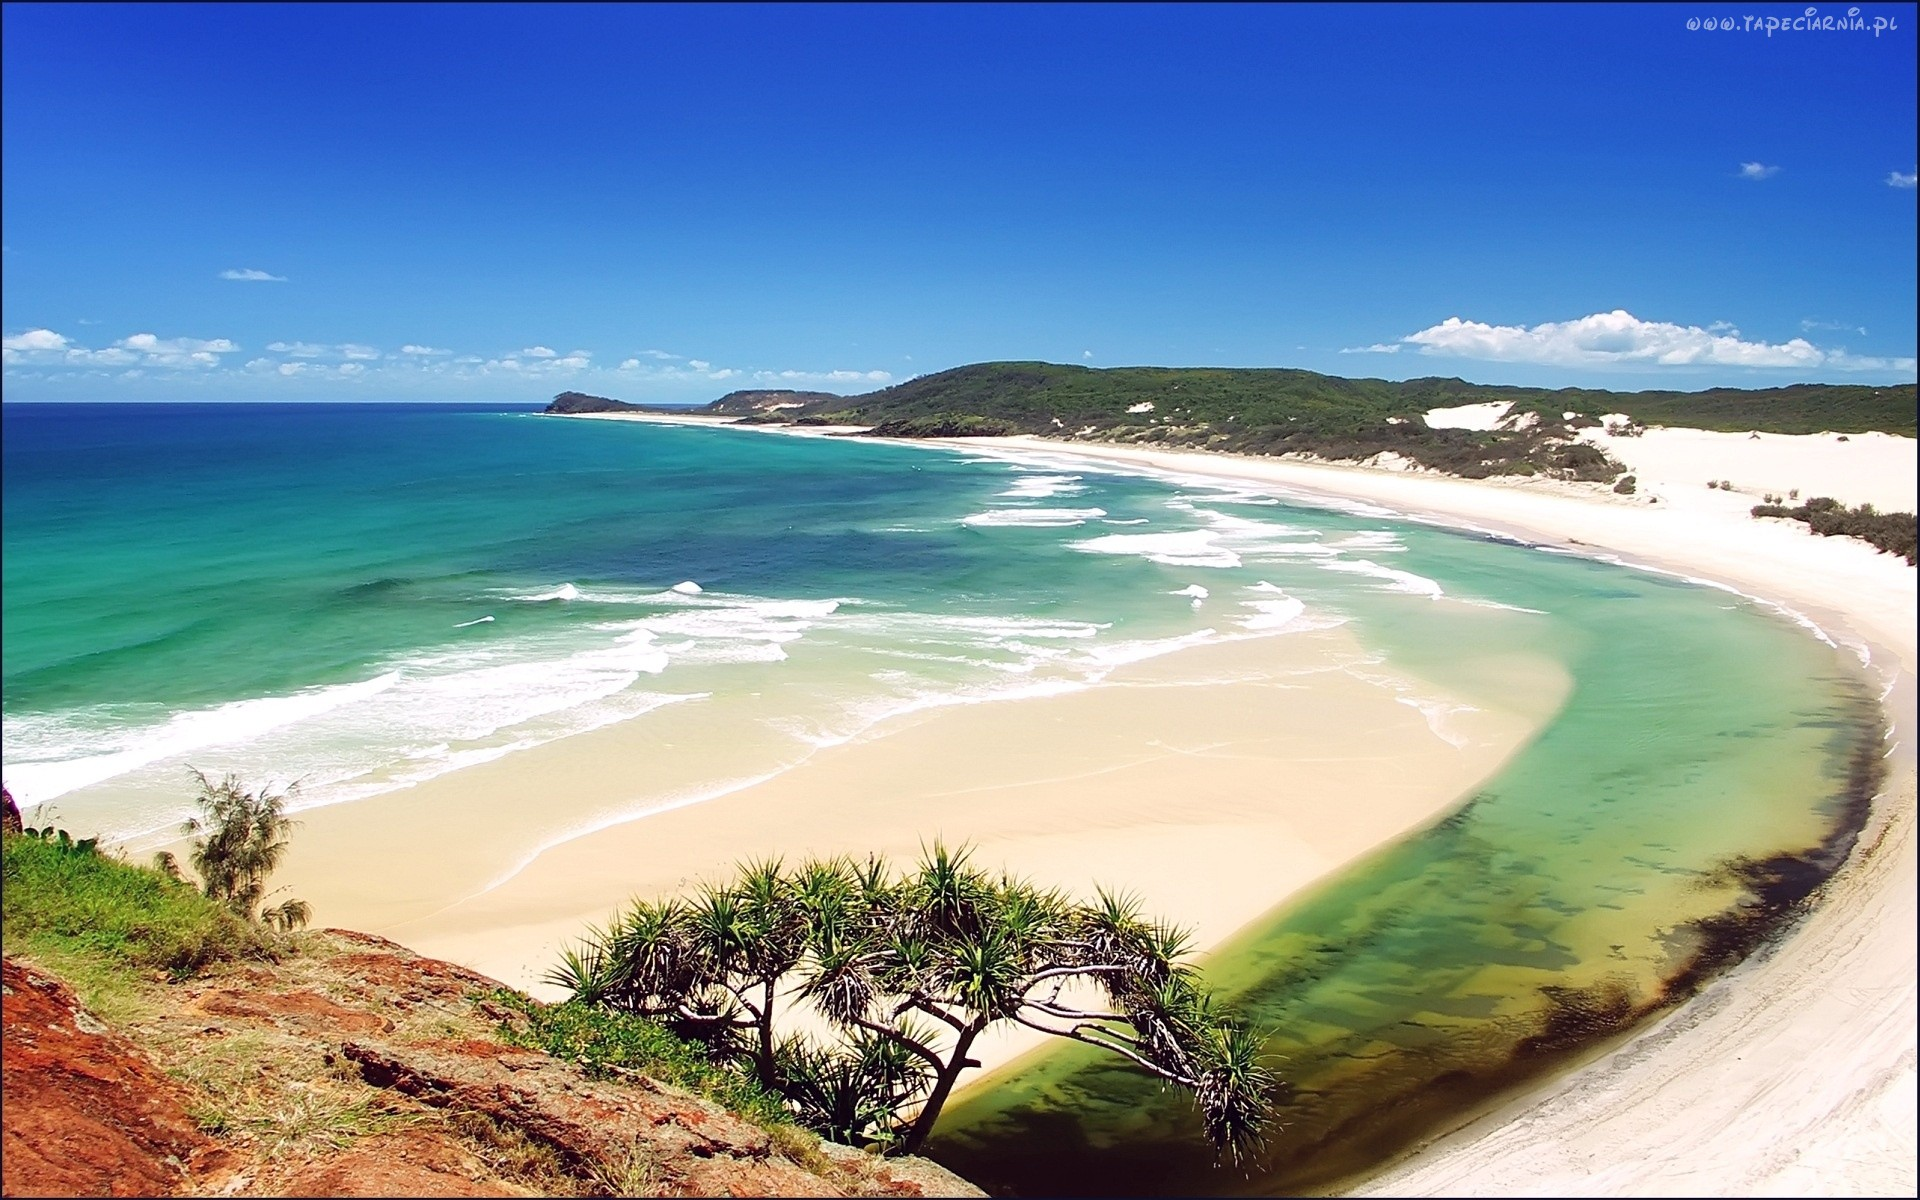

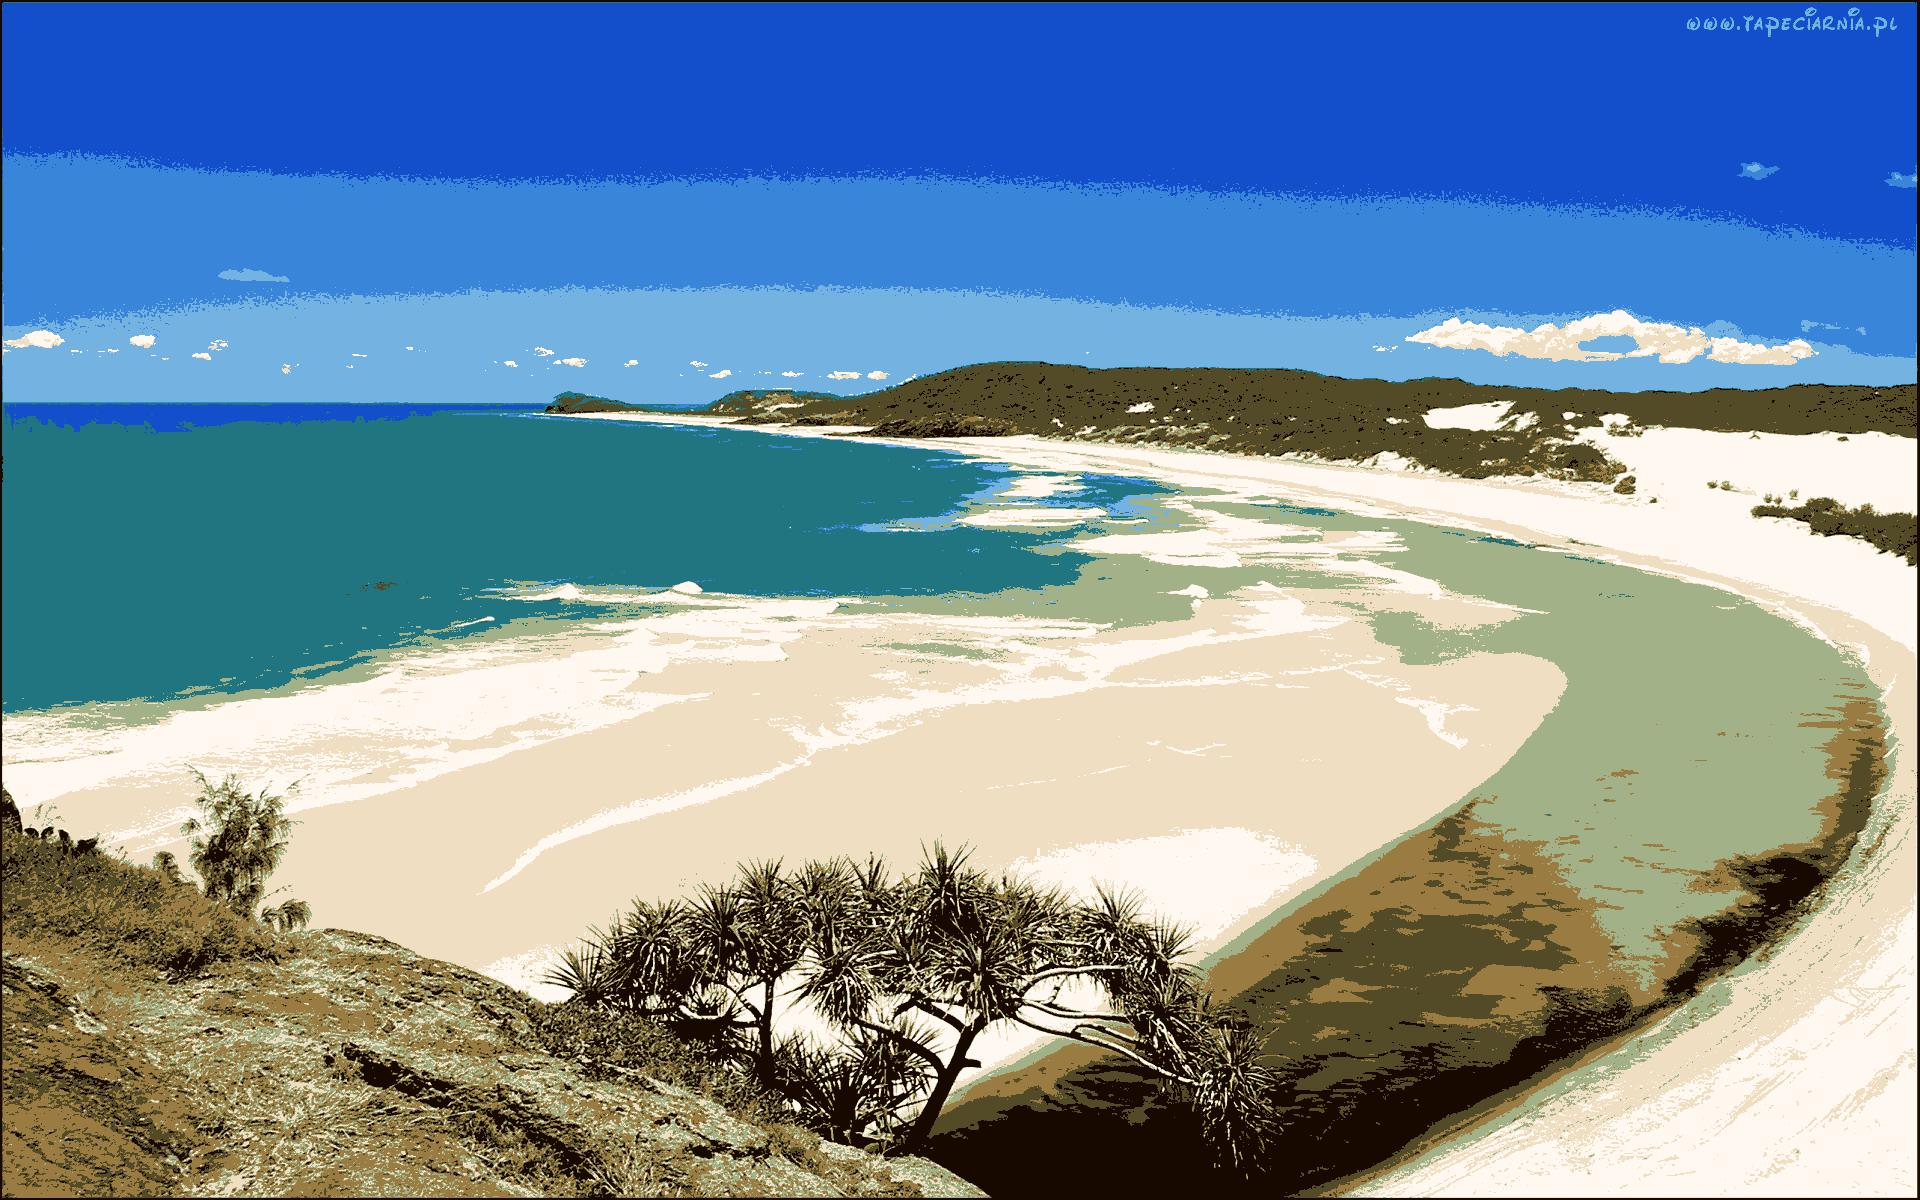

In [7]:
compare_photos("zdjecie4.jpg","z4.jpg",10)

Czas:  13.3757030964


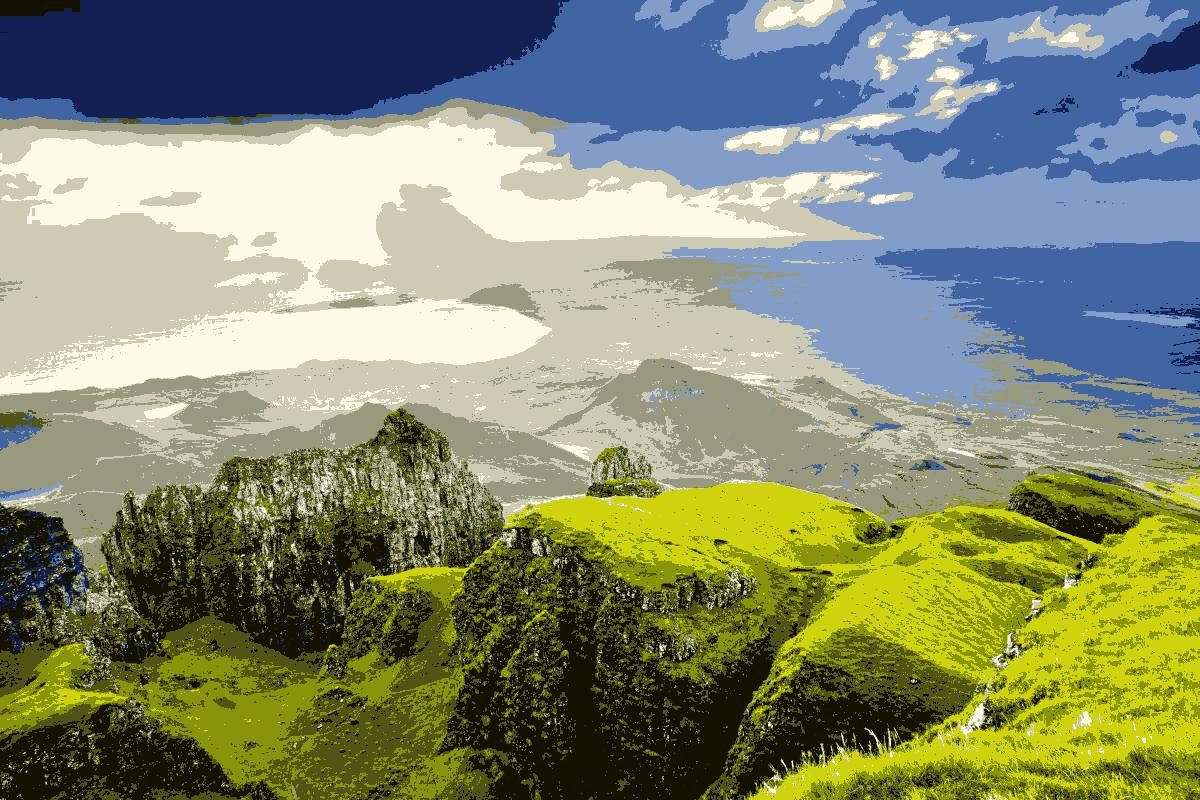

In [8]:
compare_photos("zdjecie5.jpg","z5.jpg",10)